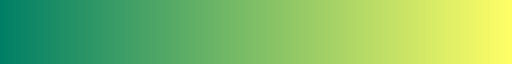

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point
pd.options.display.max_columns = 25
sns.color_palette("summer",as_cmap=True)

In [2]:
turistas = pd.read_csv("data/52047.csv",sep=";")
turistas["Concepto turístico"].unique()

array(['Turistas', 'Pernoctaciones', 'Duración media de los viajes'],
      dtype=object)

In [3]:
turistas["Periodo"].unique()

array(['2023M03', '2023M02', '2023M01', '2022M12', '2022M11', '2022M10',
       '2022M09', '2022M08', '2022M07', '2022M06', '2022M05', '2022M04',
       '2022M03', '2022M02', '2022M01', '2021M12', '2021M11', '2021M10',
       '2021M09', '2021M08', '2021M07', '2021M06', '2021M05', '2021M04',
       '2021M03', '2021M02', '2021M01', '2020M12', '2020M11', '2020M10',
       '2020M09', '2020M08', '2020M07', '2020M06', '2020M05', '2020M04',
       '2020M03', '2020M02', '2020M01', '2019M12', '2019M11', '2019M10',
       '2019M09', '2019M08', '2019M07'], dtype=object)

In [4]:
turistas = pd.read_csv("data/52047.csv",sep=";")
turistas["year"] = turistas["Periodo"].apply(lambda x: x[:4])
turistas["Total"] = turistas["Total"].str.replace(".","")
turistas["Total"] = turistas["Total"].str.replace(",",".")
turistas["Total"] = turistas["Total"].str.replace(r'^\s*$', "0", regex=True)
turistas["Total"] = turistas.Total.fillna(0).astype(float)

name_fix = {"Alicante/Alacant":"Alacant/Alicante",
            "Balears, Illes":"Illes Balears",
            "Castellón/Castelló":"Castelló/Castellón",
            "Coruña, A":"A Coruña",
            "Rioja, La":"La Rioja",
            "Valencia/València":"València/Valencia"}
turistas["Provincia de destino"] = turistas["Provincia de destino"].apply(lambda x: name_fix[x] if x in name_fix else x)

In [5]:
turistas.head()

,RESIDENCIA/ORIGEN,Continentes,Países,Provincia de destino,Concepto turístico,Periodo,Total,year
0,Total,NaN,NaN,Total Nacional,Turistas,2023M03,5639935.0,2023
1,Total,NaN,NaN,Total Nacional,Turistas,2023M02,4502738.0,2023
2,Total,NaN,NaN,Total Nacional,Turistas,2023M01,4602539.0,2023
3,Total,NaN,NaN,Total Nacional,Turistas,2022M12,4451187.0,2022
4,Total,NaN,NaN,Total Nacional,Turistas,2022M11,5011551.0,2022


In [6]:
viajeros = turistas[turistas["Concepto turístico"] == "Turistas"].groupby(["year","Provincia de destino"]).sum(numeric_only=True).reset_index()
viajeros.rename(columns={"Provincia de destino":"NAMEUNIT"},inplace=True)

In [7]:
viajeros.head()

,year,NAMEUNIT,Total
0,2019,A Coruña,1341393.0
1,2019,Alacant/Alicante,11465764.0
2,2019,Albacete,325433.0
3,2019,Almería,1754065.0
4,2019,Araba/Álava,739738.0


In [8]:
provincias = gpd.read_file('data/lineas_limite.zip!SHP_ETRS89/recintos_provinciales_inspire_peninbal_etrs89')
#INSPIREID', 'COUNTRY', 'NATLEV', 'NATLEVNAME', 'NATCODE', 'NAMEUNIT', 'CODNUT1', 'CODNUT2', 'CODNUT3', 'geometry'
provincias = provincias.to_crs("+proj=cea EPSG:2062")
provincias['area'] = round(provincias.area/1000000,0)
provincias['latitud'] = provincias.centroid.map(lambda p: p.y)
#Mapa de coropletas: mapa temÃ¡tico con las Ã¡reas sombreadas de diferentes colores en funciÃ³n del valor de una columna
provincias = provincias.to_crs(crs=3395)
#LÃ­mites de las provincias

In [9]:
provincias.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   INSPIREID   51 non-null     object  
 1   COUNTRY     51 non-null     object  
 2   NATLEV      51 non-null     object  
 3   NATLEVNAME  51 non-null     object  
 4   NATCODE     51 non-null     object  
 5   NAMEUNIT    51 non-null     object  
 6   CODNUT1     51 non-null     object  
 7   CODNUT2     51 non-null     object  
 8   CODNUT3     0 non-null      float64 
 9   geometry    51 non-null     geometry
 10  area        51 non-null     float64 
 11  latitud     51 non-null     float64 
dtypes: float64(3), geometry(1), object(8)
memory usage: 4.9+ KB


In [10]:
provincias_viajeros = provincias.merge(right=viajeros,on="NAMEUNIT")

In [11]:
provincias_viajeros.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   INSPIREID   250 non-null    object  
 1   COUNTRY     250 non-null    object  
 2   NATLEV      250 non-null    object  
 3   NATLEVNAME  250 non-null    object  
 4   NATCODE     250 non-null    object  
 5   NAMEUNIT    250 non-null    object  
 6   CODNUT1     250 non-null    object  
 7   CODNUT2     250 non-null    object  
 8   CODNUT3     0 non-null      float64 
 9   geometry    250 non-null    geometry
 10  area        250 non-null    float64 
 11  latitud     250 non-null    float64 
 12  year        250 non-null    object  
 13  Total       250 non-null    float64 
dtypes: float64(4), geometry(1), object(9)
memory usage: 27.5+ KB


/home/nacho/Documents/MIARFID/PID/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1415: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


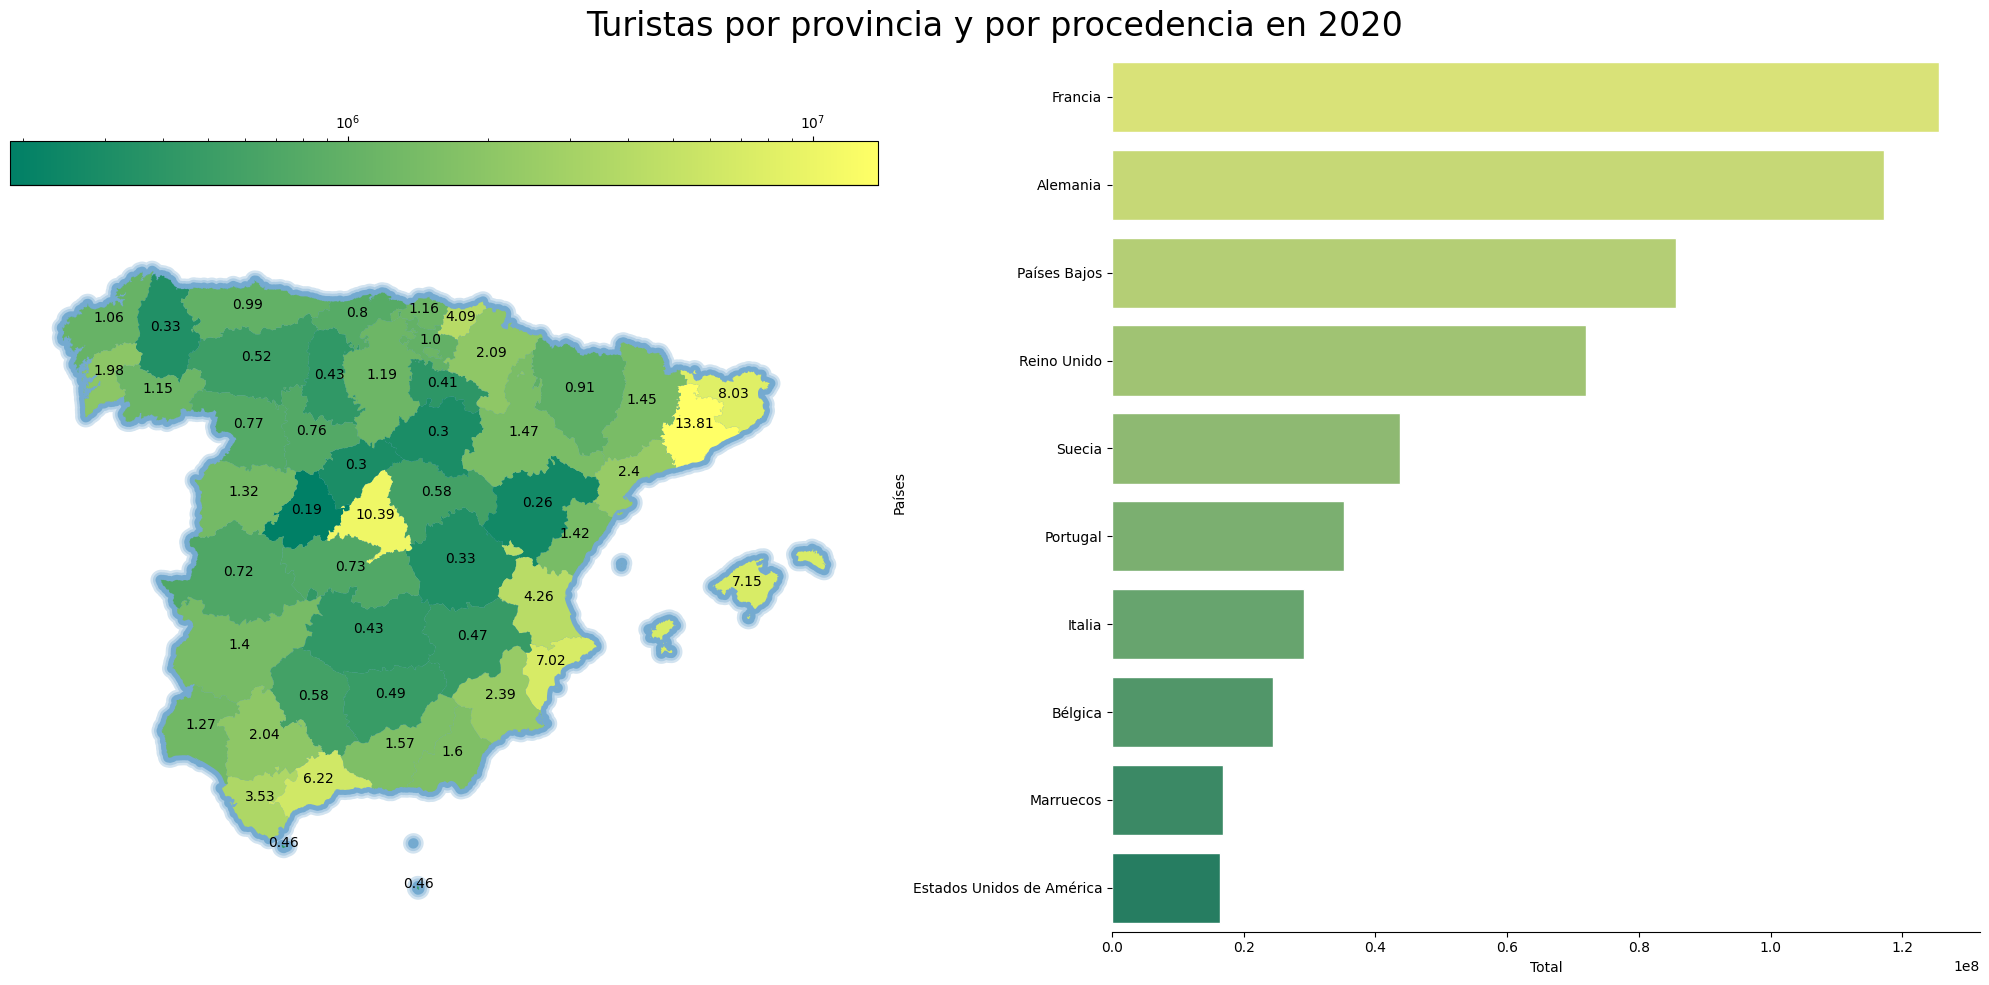

In [28]:
fig,(ax,ax1) = plt.subplots(figsize=(20,10),ncols=2)
draw_year = "2020"
paises_agregados = ["Unión Europea (sin España)","América del Norte","Sudamérica","Centro América y Caribe"]
turistas_year = turistas[(turistas["year"] == draw_year) & ~turistas["Países"].isin(paises_agregados)].groupby(by="Países").sum(numeric_only=True).reset_index()


df_plot = provincias_viajeros[(provincias_viajeros["year"] == draw_year)& ~turistas["Países"].isin(paises_agregados)]
ax = df_plot.dissolve().buffer(20000).plot(ax = ax,figsize=(15,15),alpha=0.2)
ax = df_plot.dissolve().buffer(15000).plot(ax = ax,figsize=(15,15),alpha=0.2)
ax = df_plot.dissolve().buffer(10000).plot(ax = ax,figsize=(15,15),alpha=0.4)
df_plot.plot(
    ax = ax,
    column="Total",
    legend=True,
    cmap="summer",
    norm=matplotlib.colors.LogNorm(
        vmin=df_plot.Total.min(), 
        vmax=df_plot.Total.max()
    ), 
    legend_kwds={'location': 'top'}

)
df_plot.apply(
    lambda x: ax.annotate(
        text=round(x.Total / 1_000_000,2),
        xy=x.geometry.centroid.coords[0], 
        ha='center',
        fontsize=10
    ),
    axis=1
)


ax.axis("off")
#sns.set_theme()
with sns.axes_style("darkgrid"):
    ax1 = sns.barplot(data=turistas_year.nlargest(10,"Total"),x="Total",ax=ax1,y="Países",palette="summer_r")
sns.despine(left=True)
fig.suptitle(f"Turistas por provincia y por procedencia en {draw_year}",fontsize=24)
fig.tight_layout()
